# **Classification**

## Objectives

* Fit and evaluate a classification model to predict if tomorrow's average price will be higher or lower than today's

## Inputs

* outputs/datasets/cleaned/phnx_2010_2025.csv
* Instructions on which variables to use for data cleaning and feature engineering. They are found in each respective notebook

## Outputs

* Train set (features and target)
* Test set (features and target)
* Data cleaning and Feature Engineering pipeline
* Modeling pipeline
* Feature importance plot

## Additional Comments

* The target variable is binary, where 0 indicates that tomorrow's average stock price is lower than today's, and 1 indicates that it is higher


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\ajv10\\Documents\\vscode-projects\\PP5\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ajv10\\Documents\\vscode-projects\\PP5'

---

## Load Data

Load the data and drop the regression target

In [4]:
import numpy as np
import pandas as pd
df = (pd.read_csv("outputs/datasets/cleaned/phnx_2010_2025.csv")
      .drop(labels=['tomorrows_average'], axis=1))
print(df.shape)
df.head(3)

(3785, 21)


,year,weekday,open,high,low,close,volume,pre_open,pre_open_2,pre_high,...,pre_low,pre_low_2,pre_close,pre_close_2,pre_vol,pre_vol_2,pre_average,pre_average_2,average,target
0,2010,Wednesday,497.990021,497.990021,497.990021,497.990021,10729.0,507.246289,477.996320,510.282389,...,507.246289,477.996320,497.990021,497.990021,10729.0,13401.0,502.618155,487.993170,497.990021,1
1,2010,Thursday,507.468427,507.468427,503.543762,503.543762,6169.0,497.990021,507.246289,497.990021,...,497.990021,507.246289,497.990021,497.990021,10729.0,10729.0,497.990021,502.618155,505.506095,0
2,2010,Friday,503.543762,503.543762,503.543762,503.543762,6169.0,507.468427,497.990021,507.468427,...,503.543762,497.990021,503.543762,497.990021,6169.0,10729.0,505.506095,497.990021,503.543762,0


---

In [5]:
df.columns

Index(['year', 'weekday', 'open', 'high', 'low', 'close', 'volume', 'pre_open',
       'pre_open_2', 'pre_high', 'pre_high_2', 'pre_low', 'pre_low_2',
       'pre_close', 'pre_close_2', 'pre_vol', 'pre_vol_2', 'pre_average',
       'pre_average_2', 'average', 'target'],
      dtype='object')

In [6]:
to_remove = ['volume',
 'pre_vol',
 'pre_vol_2',
 'low',
 'close',
 'average',
 'pre_average',
 'pre_low_2',
 'pre_average_2',
 'pre_close',
 'pre_close_2',
 'high',
 'pre_high',
 'pre_high_2',
 'pre_open',
 'open',
 'pre_open_2']

In [7]:
variables = list(df.columns)
variables.pop()
# variables.pop(0)

'target'

In [8]:
# variables = [item for item in variables if item not in to_remove]

In [9]:
variables

['year',
 'weekday',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'pre_open',
 'pre_open_2',
 'pre_high',
 'pre_high_2',
 'pre_low',
 'pre_low_2',
 'pre_close',
 'pre_close_2',
 'pre_vol',
 'pre_vol_2',
 'pre_average',
 'pre_average_2',
 'average']

In [10]:
# df = df.query("year >= 2015").copy()
# df

In [11]:
# df = df.drop(['weekday'],axis=1)
# df

In [12]:
# df = df[['weekday', 'close', 'open', 'pre_close', 'target']]

---

## ML Pipeline: Classification

In [13]:
from sklearn.pipeline import Pipeline

# Feature Engineering
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.encoding import OrdinalEncoder


def PipelineDataCleaningAndFeatureEngineering():
    pipeline_base = Pipeline([
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                     variables=['weekday'])),
        # ("OutlierWinsorizer", Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['open', 'high', 'low', 'close', 'volume'])),
        # ("YeoJohnsonNumericalTransformer", vt.YeoJohnsonTransformer(variables=variables)),  # ['open', 'high', 'low', 'close', 'volume']
        # ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
        #  method="spearman", threshold=0.6, selection_method="variance")),

    ])

    return pipeline_base


PipelineDataCleaningAndFeatureEngineering()

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['weekday']))])

In [14]:
# Feat Scaling
from sklearn.preprocessing import StandardScaler

# Feat Selection
from sklearn.feature_selection import SelectFromModel

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


def PipelineClf(model):
    pipeline_base = Pipeline([
        ("scaler", StandardScaler()),
        ("feat_selection", SelectFromModel(model)),
        ("model", model),
    ])

    return pipeline_base

In [15]:
from sklearn.model_selection import GridSearchCV


class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")

            model = PipelineClf(self.models[key])
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, )
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        columns = ['estimator', 'min_score',
                   'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]
        return df[columns], self.grid_searches

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['target'], axis=1),
    df['target'],
    test_size=0.2,
    random_state=0,
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3028, 20) (3028,) (757, 20) (757,)


In [17]:
pipeline_data_cleaning_feat_eng = PipelineDataCleaningAndFeatureEngineering()
X_train = pipeline_data_cleaning_feat_eng.fit_transform(X_train)
X_test = pipeline_data_cleaning_feat_eng.transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3028, 20) (3028,) (757, 20) (757,)


---

## Target Imbalance

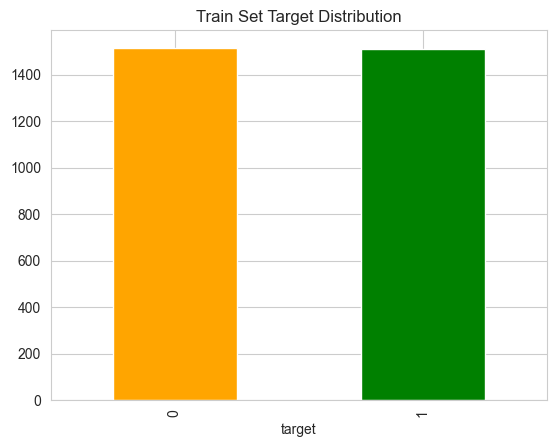

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
y_train.value_counts().plot(kind='bar', color=['orange', 'green'], title='Train Set Target Distribution')
plt.show()

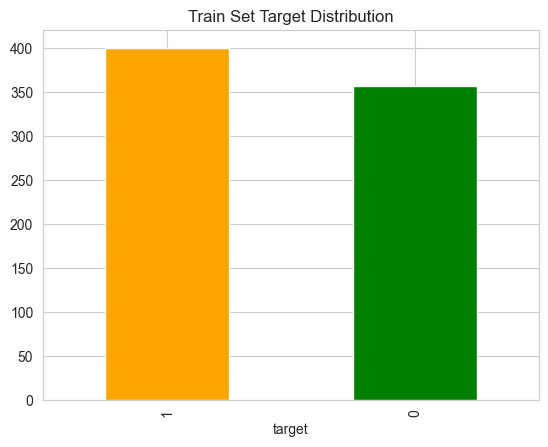

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
y_test.value_counts().plot(kind='bar', color=['orange', 'green'], title='Train Set Target Distribution')
plt.show()

---

## Grid Search CV - Sklearn

In [20]:
models_quick_search = {
    "LogisticRegression": LogisticRegression(random_state=0),
    "XGBClassifier": XGBClassifier(random_state=0),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "RandomForestClassifier": RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=0),
    "ExtraTreesClassifier": ExtraTreesClassifier(random_state=0),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=0),
}

# empyt dictionary means the default hyperparameters will be used
params_quick_search = {
    "LogisticRegression": {},
    "XGBClassifier": {},
    "DecisionTreeClassifier": {},
    "RandomForestClassifier": {},
    "GradientBoostingClassifier": {},
    "ExtraTreesClassifier": {},
    "AdaBoostClassifier": {},
}

In [21]:
from sklearn.metrics import make_scorer, recall_score


search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
search.fit(X_train, y_train,
           scoring =  make_scorer(recall_score, pos_label=1),
           n_jobs=-1, cv=5)


Running GridSearchCV for LogisticRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\ajv10\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(



Running GridSearchCV for DecisionTreeClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for AdaBoostClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [22]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary 

,estimator,min_score,mean_score,max_score,std_score
0,LogisticRegression,0.660066,0.692466,0.725166,0.02457
4,GradientBoostingClassifier,0.609272,0.635585,0.675497,0.022733
5,ExtraTreesClassifier,0.556291,0.599185,0.620462,0.02416
3,RandomForestClassifier,0.529801,0.578041,0.625828,0.032483
6,AdaBoostClassifier,0.481848,0.55959,0.655629,0.061915
2,DecisionTreeClassifier,0.5,0.558805,0.627063,0.042124
1,XGBClassifier,NaN,NaN,NaN,NaN


---

# Section 2

Section 2 content

In [23]:
models_search = {
    # "AdaBoostClassifierDT": AdaBoostClassifier(random_state=0),
    # "AdaBoostClassifierLR": AdaBoostClassifier(random_state=0),
    "LogisticRegression": LogisticRegression(random_state=0),
    # "GradientBoostingClassifier": GradientBoostingClassifier(random_state=0),
}

# Documentation to help on hyperparameter list:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

# We will not conduct an extensive search, since the focus
# is on how to combine all knowledge in an applied project.
# In a workplace project, you may spend more time in this step
params_search = {
    # "AdaBoostClassifierDT": {
    #     'model__estimator': [DecisionTreeClassifier()],
    #     'model__estimator__max_depth': [7, 5, 6],
    #     'model__estimator__min_samples_split': [10, 6, 8],
    #     'model__estimator__min_samples_leaf': [5, 3, 4],
    #     'model__n_estimators': [600, 800, 700],
    #     'model__learning_rate': [1.0, 2.0],
    # },
    # "AdaBoostClassifierLR": {
    #     'model__estimator': [LogisticRegression()],
    #     'model__estimator__penalty': ['l1'],
    #     'model__estimator__solver': ['liblinear'],
    #     'model__estimator__C': [600, 1000],
    #     'model__estimator__max_iter': [200, 300],
    #     'model__estimator__tol': [0.1, 0.2],
    #     'model__estimator__class_weight': [None, 'balanced'],
    #     'model__n_estimators': [50, 100, 200],
    #     'model__learning_rate': [0.1, 1.0],
    # },
    "LogisticRegression": [
        {
            'model__penalty': ['l1'],
            'model__solver': ['liblinear', 'saga'],
            'model__C': [400, 600, 800, 1000],
            'model__max_iter': [400, 600, 800, 1000],
            'model__tol': [0.5, 0.7, 0.9],
            'model__class_weight': [None],
            'model__fit_intercept': [True, False],
            'model__warm_start': [True, False], 
        },
        {
            'model__penalty': ['l2'],
            'model__solver': ['newton-cg', 'sag', 'saga'],  # 'lbfgs',
            'model__C': [200, 100, 10],  # 0.1, 0.01, 0.001
            'model__max_iter': [400, 800, 1000],  # 10, 20, 50, 100, 
            'model__tol': [1e-8, 1e-9],  # 1e-4, 1e-5, 
            'model__class_weight': [None, 'balanced'],
            'model__fit_intercept': [True, False],  
        },
        {
            'model__penalty': ['elasticnet'],
            'model__solver': ['saga'],
            'model__C': [200, 100, 10],
            'model__max_iter': [800, 1000],
            'model__tol': [1e-8, 1e-9],
            'model__class_weight': [None, 'balanced'],
            'model__fit_intercept': [True, False],
            'model__l1_ratio': [0, 1],
        },
        {
            'model__penalty': [None],
            'model__solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'model__C': [200, 100, 10, 1.0],
            'model__max_iter': [400, 800, 1000],
            'model__tol': [1e-8, 1e-9],
            'model__class_weight': [None, 'balanced'],
            'model__fit_intercept': [True, False], 
        },],
        # "GradientBoostingClassifier": {
        # 'model__loss': ['log_loss', 'exponential'],
        # 'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.25],
        # 'model__n_estimators': [50, 100, 200, 400],
        # 'model__subsample': [0.7, 0.8, 0.9],
        # 'model__min_samples_split': [2, 3, 4, 5],
        # 'model__min_samples_leaf': [1, 2, 3, 4],
        # 'model__max_depth': [2, 3, 4, 5],
    # }
}


In [24]:
from sklearn.metrics import recall_score, make_scorer
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train,
           scoring =  make_scorer(recall_score, pos_label=1),
           n_jobs=-1, cv=5, verbose=2)


Running GridSearchCV for LogisticRegression 

Fitting 5 folds for each of 1176 candidates, totalling 5880 fits


In [25]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__C,model__class_weight,model__fit_intercept,model__max_iter,model__penalty,model__solver,model__tol,model__warm_start,model__l1_ratio
158,LogisticRegression,0.650165,0.693797,0.728477,0.027373,600,None,False,600,l1,liblinear,0.7,True,NaN
362,LogisticRegression,0.650165,0.693797,0.728477,0.027373,1000,None,False,800,l1,liblinear,0.7,True,NaN
50,LogisticRegression,0.650165,0.693797,0.728477,0.027373,400,None,False,400,l1,liblinear,0.7,True,NaN
51,LogisticRegression,0.650165,0.693797,0.728477,0.027373,400,None,False,400,l1,liblinear,0.7,False,NaN
62,LogisticRegression,0.650165,0.693797,0.728477,0.027373,400,None,False,600,l1,liblinear,0.7,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,LogisticRegression,0.415842,0.566953,0.754967,0.137334,600,None,True,400,l1,saga,0.5,True,NaN
103,LogisticRegression,0.415842,0.566953,0.754967,0.137334,600,None,True,400,l1,saga,0.5,False,NaN
104,LogisticRegression,0.415842,0.566953,0.754967,0.137334,600,None,True,400,l1,saga,0.7,True,NaN
105,LogisticRegression,0.415842,0.566953,0.754967,0.137334,600,None,True,400,l1,saga,0.7,False,NaN


In [26]:
best_model = grid_search_summary.iloc[0,0]
best_model

'LogisticRegression'

In [27]:
best_parameters = grid_search_pipelines[best_model].best_params_
best_parameters

{'model__C': 400,
 'model__class_weight': None,
 'model__fit_intercept': False,
 'model__max_iter': 400,
 'model__penalty': 'l1',
 'model__solver': 'liblinear',
 'model__tol': 0.7,
 'model__warm_start': True}

In [28]:
pipeline_clf = grid_search_pipelines[best_model].best_estimator_
pipeline_clf

Pipeline(steps=[('scaler', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=0))),
                ('model',
                 LogisticRegression(C=400, fit_intercept=False, max_iter=400,
                                    penalty='l1', random_state=0,
                                    solver='liblinear', tol=0.7,
                                    warm_start=True))])

In [29]:
X_train.head(3)

,year,weekday,open,high,low,close,volume,pre_open,pre_open_2,pre_high,pre_high_2,pre_low,pre_low_2,pre_close,pre_close_2,pre_vol,pre_vol_2,pre_average,pre_average_2,average
628,2012,0,363.790686,372.016645,353.045237,362.605042,329171.0,360.900550,355.712965,368.904053,366.028731,352.674713,355.712965,352.674713,360.900513,253038.0,220903.0,356.787631,358.306739,363.197864
883,2013,1,492.016314,503.042913,486.677875,494.677948,240521.0,486.693131,484.411789,491.788178,492.016383,479.757814,480.989692,484.411774,486.693146,238416.0,185661.0,485.552452,485.552467,493.347131
330,2011,0,478.366530,480.958363,473.183016,477.996277,45481.0,482.809603,472.072277,482.809603,475.034272,473.553245,466.888763,479.477234,470.961517,78615.0,103143.0,481.143418,471.516897,478.181403


## Assess Feature Importance

* These are the 3 most important features in descending order. The model was trained on them: 
['close', 'open', 'pre_close']


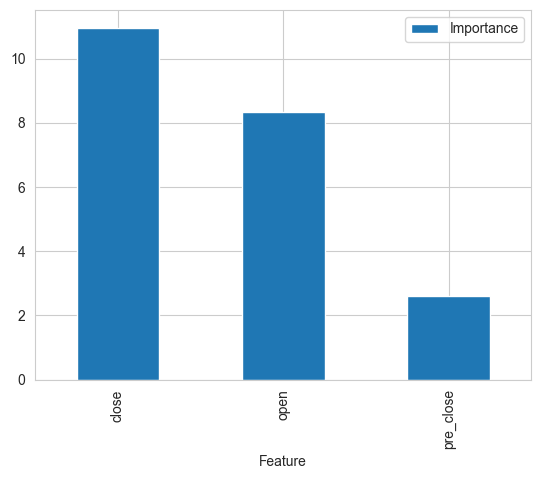

In [30]:
if best_model == 'LogisticRegression':
    # Get feature names after selection
    selected_features = X_train.columns[pipeline_clf['feat_selection'].get_support()]

    # Get model coefficients
    coefficients = pipeline_clf['model'].coef_[0]  # Use [0] for binary classification

    # Create DataFrame with absolute value of coefficients (magnitude implies importance)
    df_feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Importance': np.abs(coefficients)
    }).sort_values(by='Importance', ascending=False)

    # Get best features in descending importance
    best_features = df_feature_importance['Feature'].to_list()

    # Most important features statement and plot
    print(f"* These are the {len(best_features)} most important features in descending order. "
        f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

    df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
    plt.show()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix


def confusion_matrix_and_report(X, y, pipeline, label_map):

    prediction = pipeline.predict(X)

    print('---  Confusion Matrix  ---')
    print(pd.DataFrame(confusion_matrix(y_true=prediction, y_pred=y),
          columns=[["Actual " + sub for sub in label_map]],
          index=[["Prediction " + sub for sub in label_map]]
          ))
    print("\n")

    print('---  Classification Report  ---')
    print(classification_report(y, prediction, target_names=label_map), "\n")


def clf_performance(X_train, y_train, X_test, y_test, pipeline, label_map):
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline, label_map)

    print("#### Test Set ####\n")
    confusion_matrix_and_report(X_test, y_test, pipeline, label_map)

In [32]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline_clf,
                label_map= ['0', '1'] 
                )

#### Train Set #### 

---  Confusion Matrix  ---
             Actual 0 Actual 1
Prediction 0     1068      453
Prediction 1      448     1059


---  Classification Report  ---
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1516
           1       0.70      0.70      0.70      1512

    accuracy                           0.70      3028
   macro avg       0.70      0.70      0.70      3028
weighted avg       0.70      0.70      0.70      3028
 

#### Test Set ####

---  Confusion Matrix  ---
             Actual 0 Actual 1
Prediction 0      255      136
Prediction 1      102      264


---  Classification Report  ---
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       357
           1       0.72      0.66      0.69       400

    accuracy                           0.69       757
   macro avg       0.69      0.69      0.69       757
weighted avg       0.69      0.69      0.69      

## Refit Pipeline with Best Features

In [33]:
best_features

['close', 'open', 'pre_close']

In [34]:
def PipelineDataCleaningAndFeatureEngineering():
    pipeline_base = Pipeline([

        # ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
        #                                              variables=['weekday'])),


        # we don't need SmartCorrelatedSelection
    ])

    return pipeline_base

In [35]:
# Pipeline Optmization: Model
def PipelineClf(model):
    pipeline_base = Pipeline([
        ("scaler", StandardScaler()),
        # no feature selection needed anymore!!! We know which features to use already!
        ("model", model),
    ])

    return pipeline_base

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['target'], axis=1),
    df['target'],
    test_size=0.2,
    random_state=0,
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3028, 20) (3028,) (757, 20) (757,)


In [37]:
X_train = X_train.filter(best_features)
X_test = X_test.filter(best_features)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train.head(3)

(3028, 3) (3028,) (757, 3) (757,)


,close,open,pre_close
628,362.605042,363.790686,352.674713
883,494.677948,492.016314,484.411774
330,477.996277,478.366530,479.477234


In [38]:
# pipeline_data_cleaning_feat_eng = PipelineDataCleaningAndFeatureEngineering()
# X_train = pipeline_data_cleaning_feat_eng.fit_transform(X_train)
# X_test = pipeline_data_cleaning_feat_eng.transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3028, 3) (3028,) (757, 3) (757,)


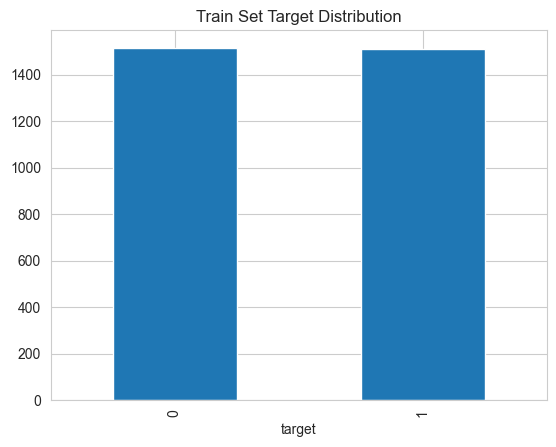

In [39]:
y_train.value_counts().plot(kind='bar',title='Train Set Target Distribution')
plt.show()

In [40]:
models_search = {'LogisticRegression': LogisticRegression(random_state=0)}

In [41]:
best_parameters

{'model__C': 400,
 'model__class_weight': None,
 'model__fit_intercept': False,
 'model__max_iter': 400,
 'model__penalty': 'l1',
 'model__solver': 'liblinear',
 'model__tol': 0.7,
 'model__warm_start': True}

In [42]:
params_search = {'LogisticRegression': {
    'model__C': [400],
    'model__class_weight': [None],
    'model__fit_intercept': [False],
    'model__max_iter': [400],
    'model__penalty': ['l1'],
    'model__solver': ['liblinear'],
    'model__tol': [0.7],
    'model__warm_start': [True]
    }
}
params_search

{'LogisticRegression': {'model__C': [400],
  'model__class_weight': [None],
  'model__fit_intercept': [False],
  'model__max_iter': [400],
  'model__penalty': ['l1'],
  'model__solver': ['liblinear'],
  'model__tol': [0.7],
  'model__warm_start': [True]}}

In [43]:
from sklearn.metrics import recall_score, make_scorer
quick_search = HyperparameterOptimizationSearch(
    models=models_search, params=params_search)
quick_search.fit(X_train, y_train,
                 scoring=make_scorer(recall_score, pos_label=1),
                 n_jobs=-1, cv=5)


Running GridSearchCV for LogisticRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [44]:
grid_search_summary, grid_search_pipelines = quick_search.score_summary(sort_by='mean_score')
grid_search_summary 

,estimator,min_score,mean_score,max_score,std_score,model__C,model__class_weight,model__fit_intercept,model__max_iter,model__penalty,model__solver,model__tol,model__warm_start
0,LogisticRegression,0.656766,0.696442,0.728477,0.024948,400,None,False,400,l1,liblinear,0.7,True


In [45]:
best_model = grid_search_summary.iloc[0, 0]
pipeline_clf = grid_search_pipelines[best_model].best_estimator_
pipeline_clf

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=400, fit_intercept=False, max_iter=400,
                                    penalty='l1', random_state=0,
                                    solver='liblinear', tol=0.7,
                                    warm_start=True))])

* These are the 3 most important features in descending order. The model was trained on them: 
['close', 'open', 'pre_close']


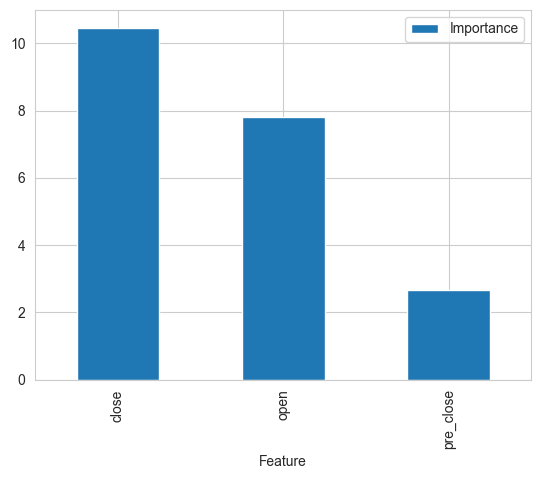

In [46]:
best_features = X_train.columns

# Get model coefficients
coefficients = pipeline_clf['model'].coef_[0]  # Use [0] for binary classification

# create DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
    'Feature': best_features,
    'Importance': np.abs(coefficients)})  # get absolute values
    .sort_values(by='Importance', ascending=False)
)


# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

In [47]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline_clf,
                label_map= ['0', '1'] 
                )

#### Train Set #### 

---  Confusion Matrix  ---
             Actual 0 Actual 1
Prediction 0     1068      452
Prediction 1      448     1060


---  Classification Report  ---
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1516
           1       0.70      0.70      0.70      1512

    accuracy                           0.70      3028
   macro avg       0.70      0.70      0.70      3028
weighted avg       0.70      0.70      0.70      3028
 

#### Test Set ####

---  Confusion Matrix  ---
             Actual 0 Actual 1
Prediction 0      255      138
Prediction 1      102      262


---  Classification Report  ---
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       357
           1       0.72      0.66      0.69       400

    accuracy                           0.68       757
   macro avg       0.68      0.68      0.68       757
weighted avg       0.69      0.68      0.68      

---

# Push files to Repo

We will generate the following files

* Train set
* Test set
* Data cleaning and Feature Engineering pipeline
* Modeling pipeline
* features importance plot

In [48]:
import joblib
import os

version = 'v1'
file_path = f'outputs/ml_pipeline/predict_target/{version}'

try:
    os.makedirs(name=file_path)
    print(f"directory {file_path} created")
except Exception as e:
    print(e)


directory outputs/ml_pipeline/predict_target/v1 created


### Train Set

In [49]:
print(X_train.shape)
X_train.head()

(3028, 3)


,close,open,pre_close
628,362.605042,363.790686,352.674713
883,494.677948,492.016314,484.411774
330,477.996277,478.366530,479.477234
1423,660.569641,660.189142,643.826965
2581,465.888733,491.303563,504.110565


In [50]:
X_train.to_csv(f"{file_path}/X_train.csv", index=False)
print(f'train set saved to {file_path}/X_train.csv')

train set saved to outputs/ml_pipeline/predict_target/v1/X_train.csv


In [51]:
y_train

628     1
883     1
330     1
1423    0
2581    1
       ..
835     1
3264    0
1653    1
2607    0
2732    0
Name: target, Length: 3028, dtype: int64

In [52]:
y_train.to_csv(f"{file_path}/y_train.csv", index=False)
print(f'train set saved to {file_path}/y_train.csv')

train set saved to outputs/ml_pipeline/predict_target/v1/y_train.csv


### Test Set

In [53]:
print(X_test.shape)
X_test.head()

(757, 3)


,close,open,pre_close
538,412.998505,409.664911,415.591309
526,432.629883,430.777869,437.074768
2216,622.206055,630.674832,624.696960
3658,525.496887,527.494974,531.990662
776,486.693146,486.693146,486.693146


In [54]:
X_test.to_csv(f"{file_path}/X_test.csv", index=False)
print(f'test set saved to {file_path}/X_test.csv')

test set saved to outputs/ml_pipeline/predict_target/v1/X_test.csv


In [55]:
y_test

538     1
526     1
2216    0
3658    1
776     0
       ..
1032    0
3418    1
548     0
3651    1
245     1
Name: target, Length: 757, dtype: int64

In [56]:
y_test.to_csv(f"{file_path}/y_test.csv", index=False)
print(f'test set saved to {file_path}/y_test.csv')

test set saved to outputs/ml_pipeline/predict_target/v1/y_test.csv


### ML Pipelines: Data Cleaning and Feat Eng pipeline and Modelling Pipeline

In [57]:
pipeline_data_cleaning_feat_eng

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['weekday']))])

In [58]:
joblib.dump(value=pipeline_data_cleaning_feat_eng ,
            filename=f"{file_path}/clf_pipeline_data_cleaning_feat_eng.pkl")

['outputs/ml_pipeline/predict_target/v1/clf_pipeline_data_cleaning_feat_eng.pkl']

In [59]:
pipeline_clf

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=400, fit_intercept=False, max_iter=400,
                                    penalty='l1', random_state=0,
                                    solver='liblinear', tol=0.7,
                                    warm_start=True))])

In [60]:
joblib.dump(value=pipeline_clf ,
            filename=f"{file_path}/clf_pipeline_model.pkl")

['outputs/ml_pipeline/predict_target/v1/clf_pipeline_model.pkl']

### Feature Importance plot

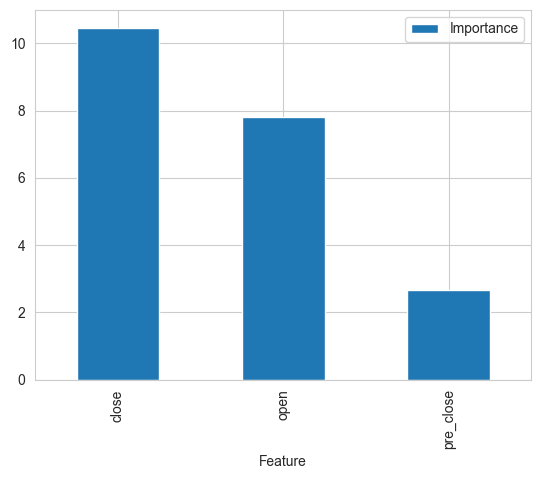

In [61]:
df_feature_importance.plot(kind='bar',x='Feature',y='Importance')
plt.show()

plot saved


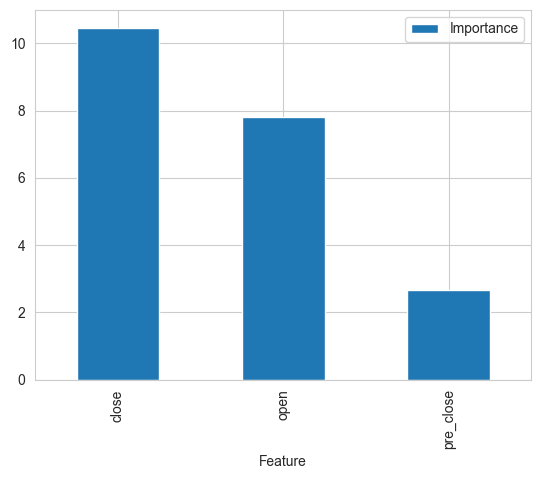

In [62]:
df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.savefig(f'{file_path}/features_importance.png', bbox_inches='tight')
print('plot saved')